In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://cocl.us/datascience_survey_data')
df.head(n=10)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [4]:
df.set_index('Unnamed: 0', inplace=True)
df.head(n=10)

,Very interested,Somewhat interested,Not interested
Unnamed: 0,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [5]:
df.index.name = None
df.head(n=10)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [6]:
df.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [10]:
df.columns.values
df_1 = df[df.columns.values].div(df[df.columns.values].sum(axis=1), axis=0).multiply(100)

In [17]:
df_1 = df_1.round(decimals= 2)

In [18]:
df_1

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


In [19]:
import matplotlib.pyplot as plt

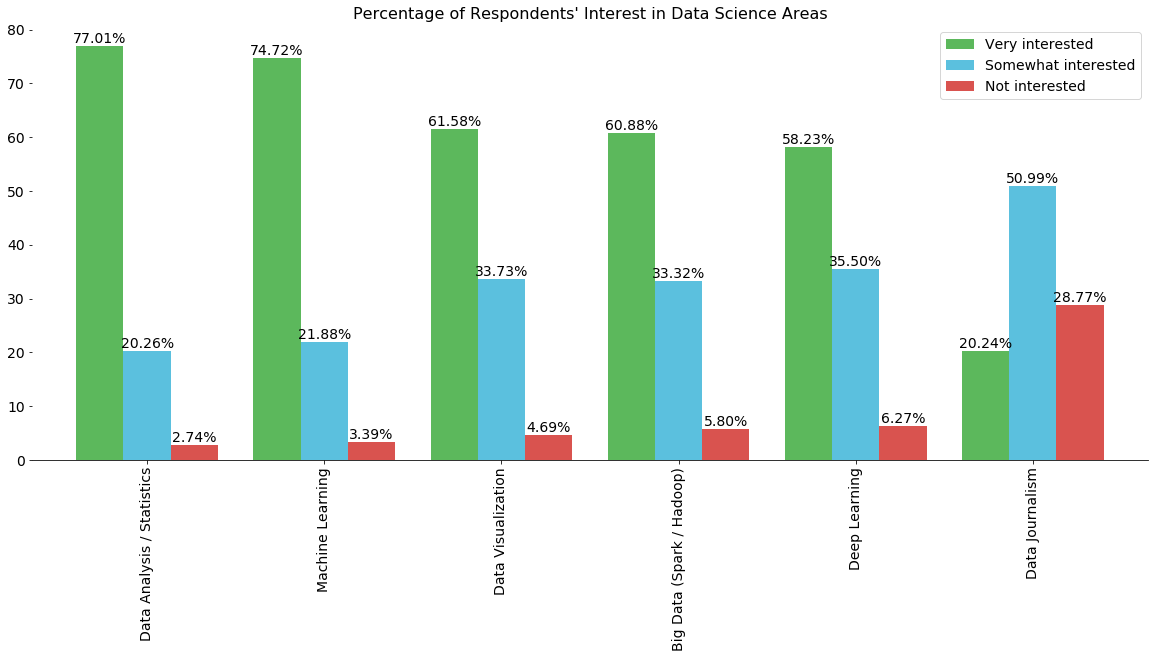

In [170]:
ax = df_1.plot(kind='bar',
               figsize= (20,8),
               width= 0.8,
               color=('#5cb85c', '#5bc0de', '#d9534f'),
               fontsize= 14)

ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
ax.legend(prop=dict(size=14))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Vertically shift label by `space`
            xytext= (0,14),
            textcoords="offset points",
            ha='center',                # Horizontally center label
            va=va,                      
            fontsize=14)           
                        

## Question 3

In [129]:
df_sanfran = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_sanfran.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [130]:
df_tot = pd.DataFrame(df_sanfran.groupby(['PdDistrict']).size())
df_tot.reset_index(inplace = True)
df_tot.columns = ['Neighborhood', 'Count']

In [131]:
df_tot

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [132]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /Users/vedhoos/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.3.0               |           py37_0         769 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.7.12               |           py37_1         3.0 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h0b31af3_0         1.9 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                        

In [141]:
import requests
import json

latitude = 37.77
longitude = -122.42
response = json.loads(requests.get("https://cocl.us/sanfran_geojson").text)
print("Json downloaded")

Json downloaded


In [144]:
response

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'DISTRICT': 'CENTRAL',
    'COMPANY': 'A',
    'style': {'weight': 1,
     'opacity': 0.2,
     'color': 'black',
     'fillOpacity': 0.7,
     'fillColor': '#ffffb2'},
    'highlight': {}},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.40532134644249, 37.806867516866724],
      [-122.40440122046421, 37.80885380837723],
      [-122.40438743872008, 37.80886519707406],
      [-122.40436730880846, 37.808872966044206],
      [-122.40434376667437, 37.808869624109605],
      [-122.40431429421082, 37.80881799170733],
      [-122.40394067997407, 37.80876198999871],
      [-122.40392016838871, 37.808754877186864],
      [-122.40390555965932, 37.808734021463344],
      [-122.40390814512642, 37.80871288836611],
      [-122.40471878715235, 37.80696905969842],
      [-122.4039597318324, 37.8065780972

In [163]:
# create a plain world map
import numpy as np
threshold_scale = np.linspace(df_tot['Count'].min(),
                              df_tot['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


world_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
world_map

In [164]:
world_map.choropleth(
    geo_data=response,
    data=df_tot,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    reset= True,
    legend_name='Crime Rates in San Fransisco'
)

# display map
world_map